In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['figure.facecolor'] = '#00000000'


from pandas import set_option
set_option("display.max_rows", 10)

filename = 'facies_dataset.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


##The seven variables are:

GR: this wireline logging tools measure gamma emission

ILD_log10: this is resistivity measurement

PE: photoelectric effect log

DeltaPHI: Phi is a porosity index in petrophysics.

PNHIND: Average of neutron and density log.

NM_M:nonmarine-marine indicator

RELPOS: relative position

The nine discrete facies (classes of rocks) are:

SS: Nonmarine sandstone
CSiS: Nonmarine coarse siltstone
FSiS: Nonmarine fine siltstone
SiSH: Marine siltstone and shale
MS: Mudstone (limestone)
WS: Wackestone (limestone)
D: Dolomite
PS: Packstone-grainstone (limestone)
BS: Phylloid-algal bafflestone (limestone)

log data Preprocessing  

In [3]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
#this enumerate function is used to convert any list to a dictionary with index as its subject.

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [4]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

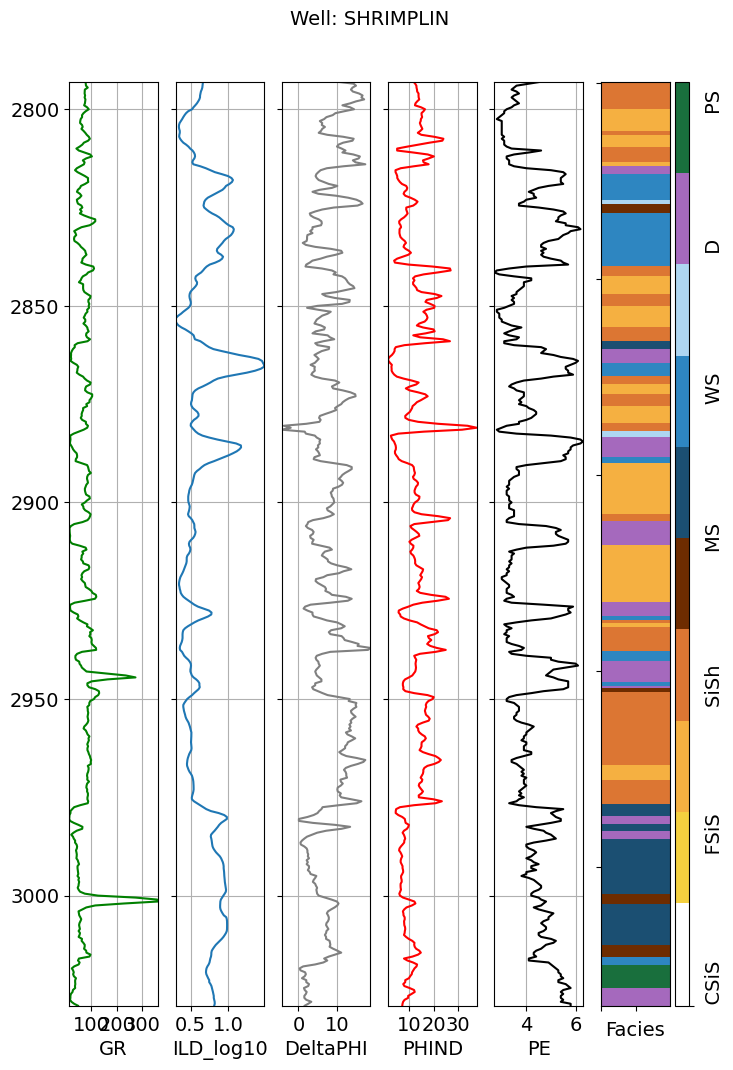

In [5]:
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)

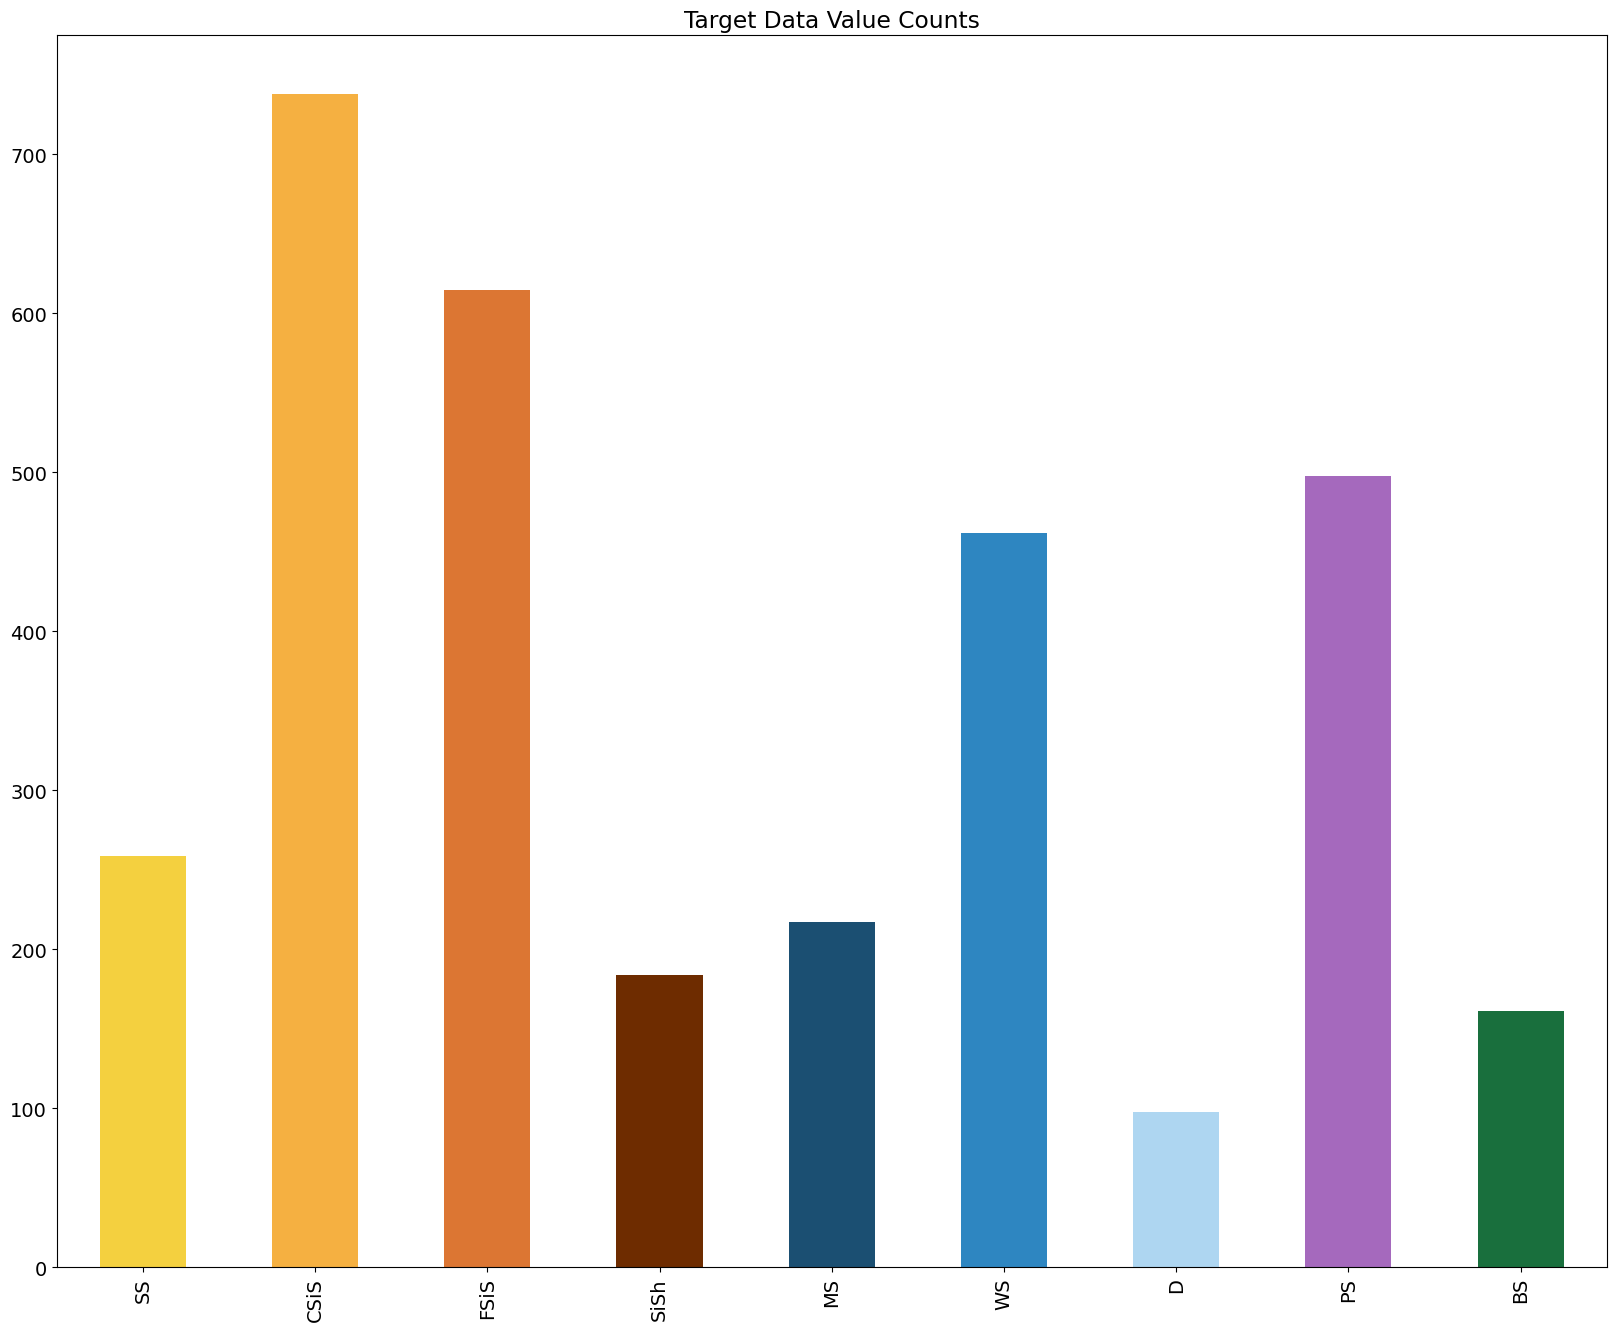

In [8]:
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D','PS', 'BS']

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

#facies_color_map is a dictionary that maps facies labels to their respective colors

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
# train_df.loc[:,'FaciesLabels'] = train_df.apply(lambda row: label_facies(row, facies_labels), axis=1)
target = 'Facies'
# target classes 
facies_counts = training_data[target].value_counts().sort_index()
facies_counts.index = facies_labels

# print(facies_counts)
%matplotlib inline
facies_counts.plot(kind='bar',color=facies_colors, title='Target Data Value Counts');

The nine discrete facies (classes of rocks) are:

SS: Nonmarine sandstone
CSiS: Nonmarine coarse siltstone
FSiS: Nonmarine fine siltstone
SiSH: Marine siltstone and shale
MS: Mudstone (limestone)
WS: Wackestone (limestone)
D: Dolomite
PS: Packstone-grainstone (limestone)
BS: Phylloid-algal bafflestone (limestone)

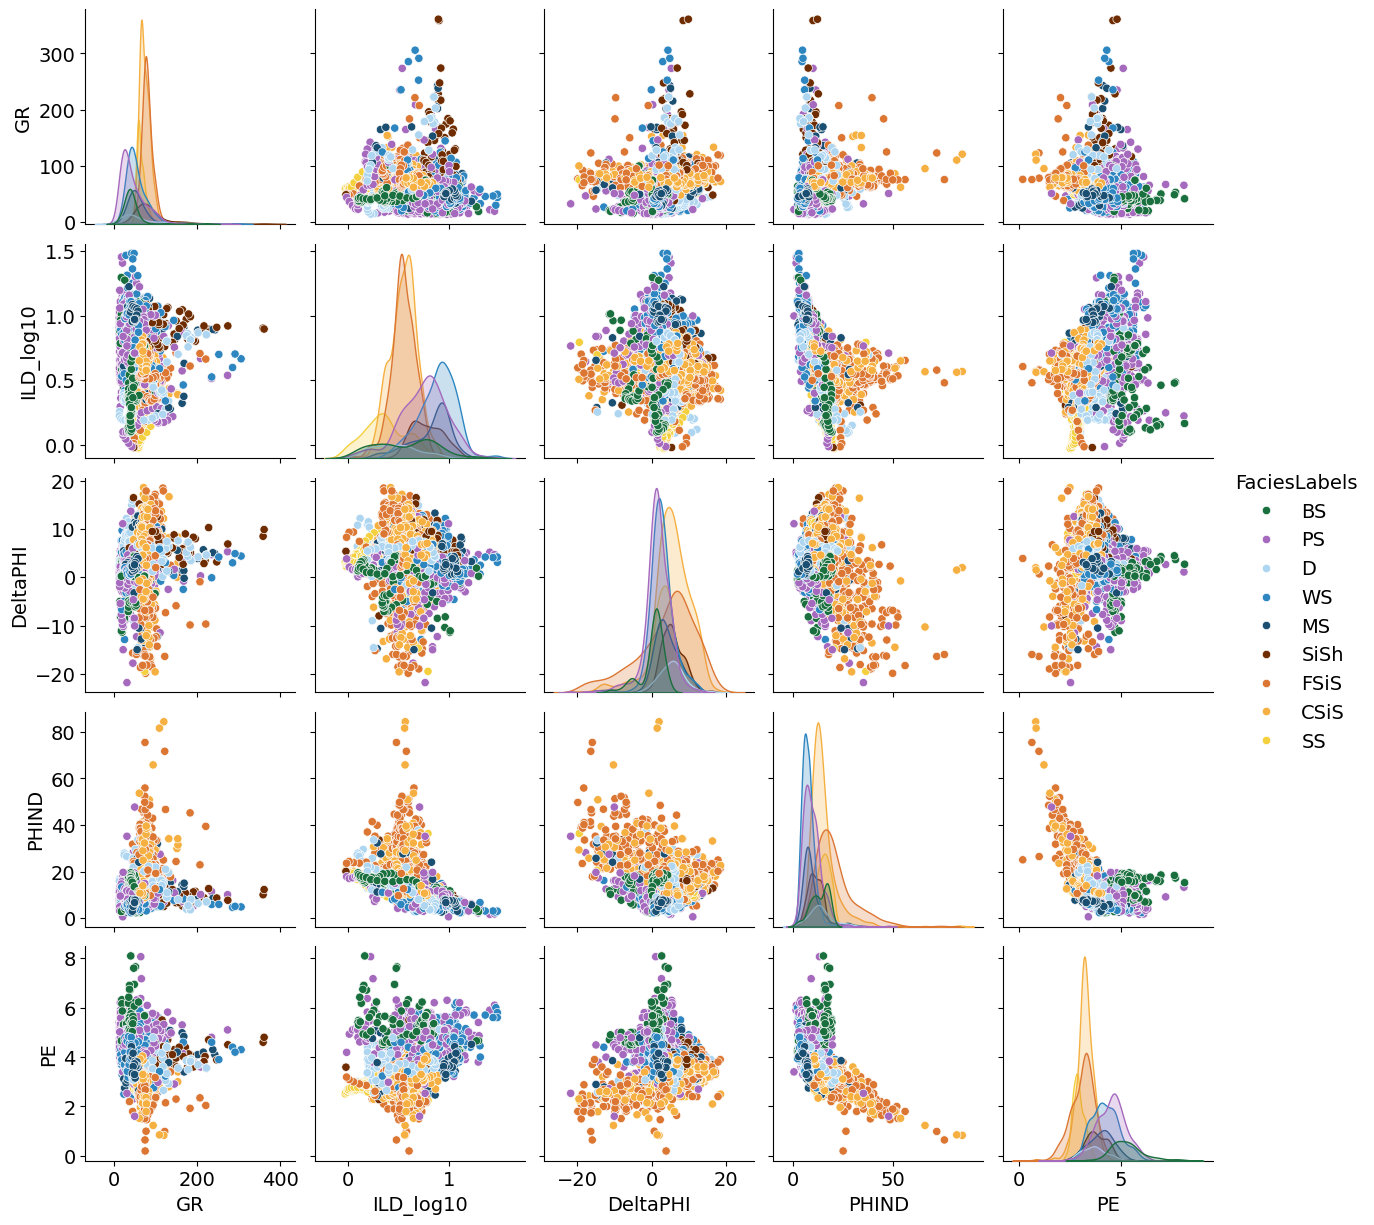

In [11]:
import seaborn as sns
%matplotlib inline
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

In [12]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


<Axes: >

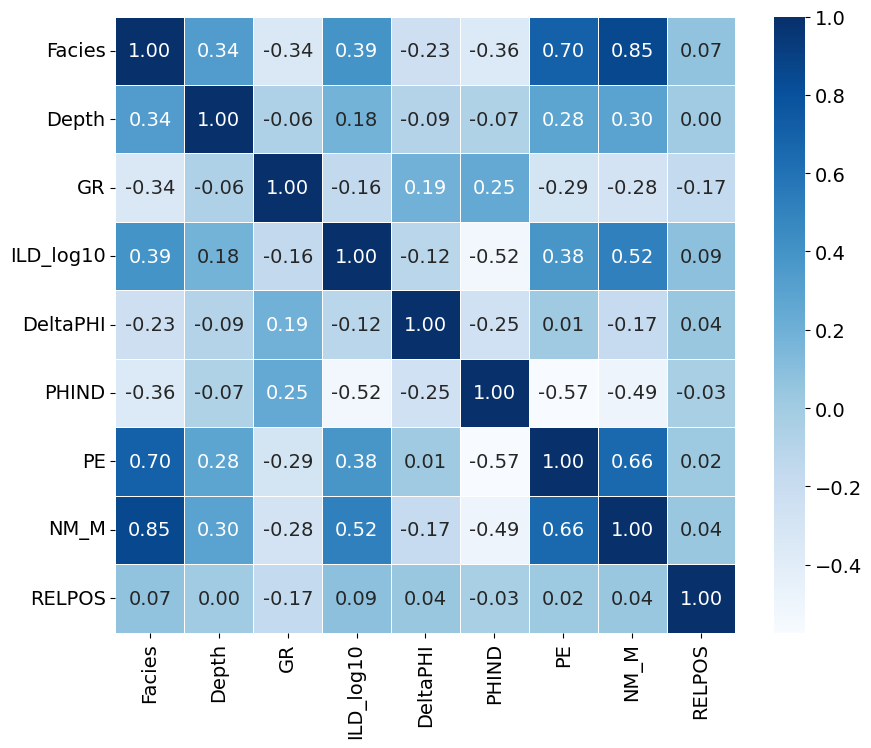

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# correlation_matrix = training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'], axis = 1).corr(method='pearson')
numeric_df = training_data.select_dtypes(include=[float, int])

# Alternatively, if you know specific columns are numeric, select them:
# numeric_df = training_data[['Column1', 'Column2', 'Column3']]

correlation_matrix = numeric_df.corr(method='pearson')
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)

In [13]:
#Data Preparation

<Axes: >

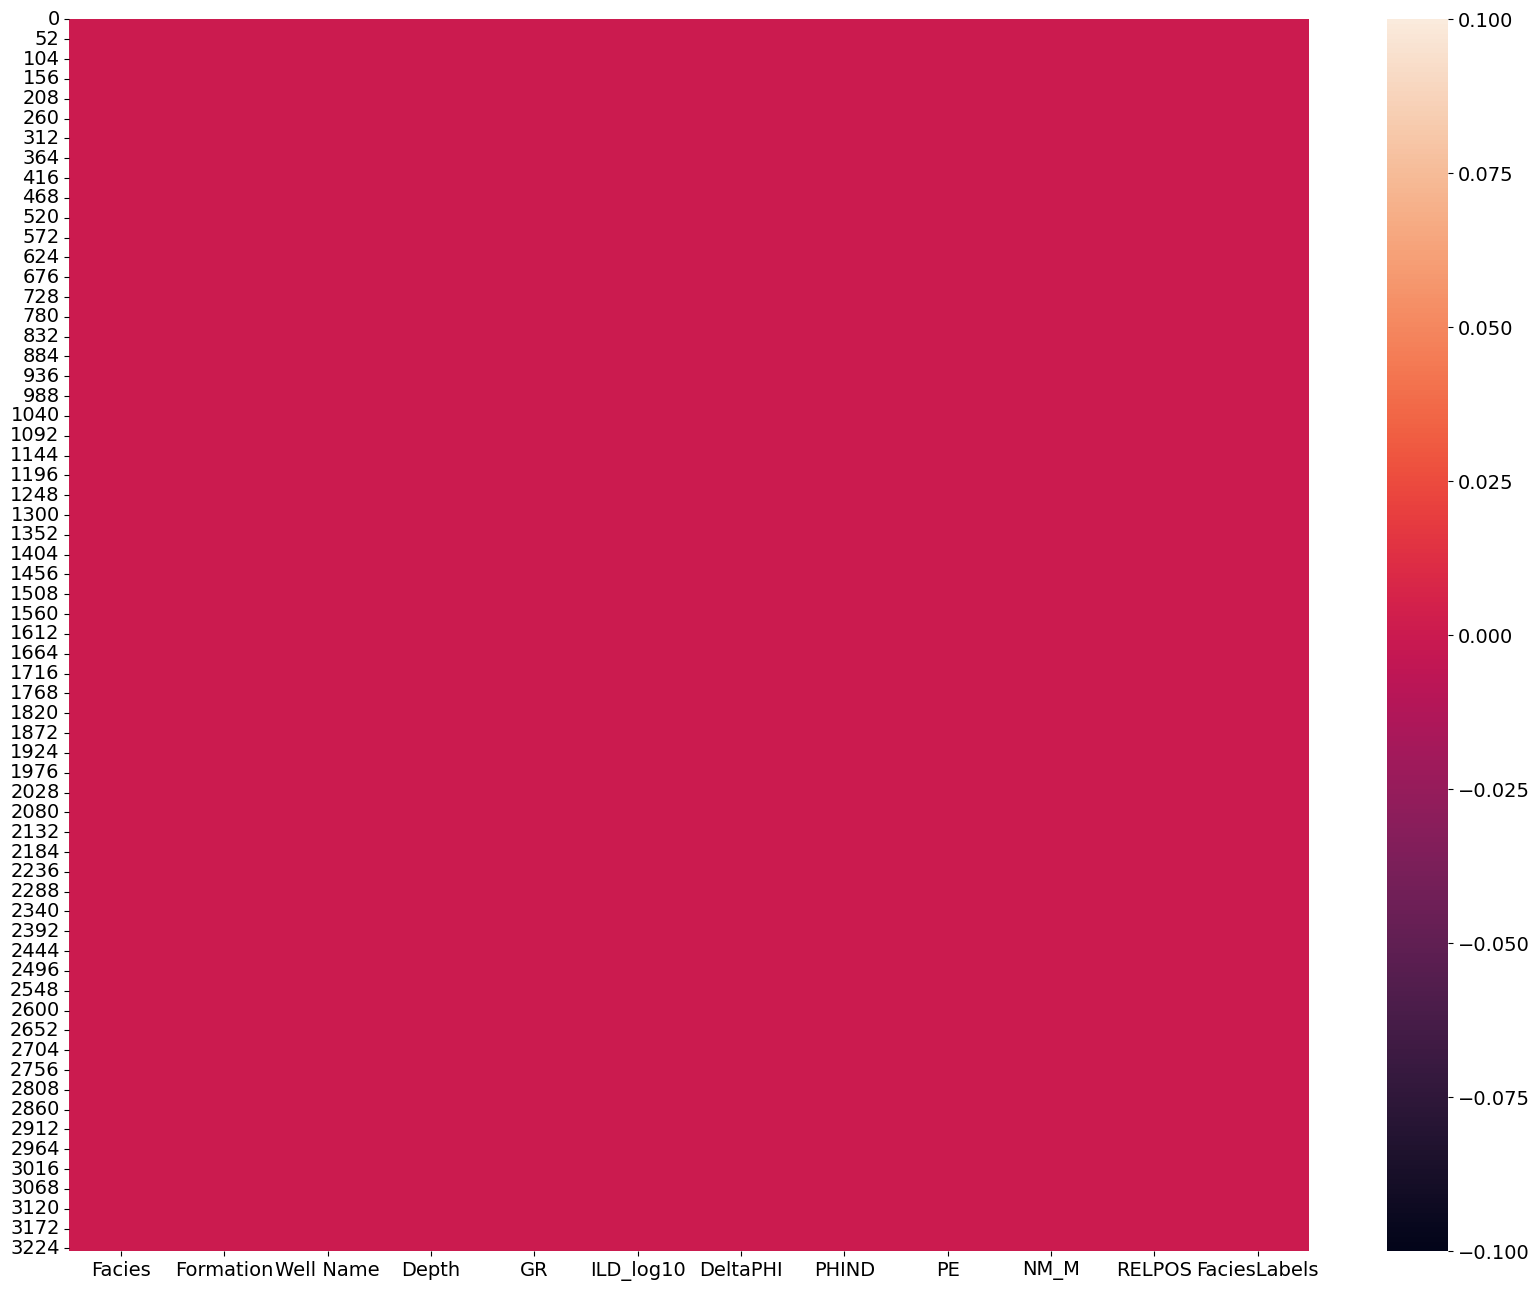

In [14]:
sns.heatmap(training_data.isna(), color = "blue")

there is no missing values...!

In [10]:
##Generating new features using Wavelet Transformation 

# import pwyt

In [11]:
##Model Building 

In [12]:
##Random Forest Model

In [13]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, correct_facies_labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state = 2021)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

In [15]:
# make a dictionary of hyperparameter values to search
space = {
    "n_estimators" :[50,150, 200], 
    "max_depth" : [15, 20, 25],
    "min_samples_leaf" : [1, 2, 3], 
    "min_samples_split" : [2, 4, 10],  
    "max_features" : [1,2]
}

In [41]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(estimator = rf_model,
                  param_grid = space,
                  scoring = ["accuracy", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "accuracy",
                  cv = 4,
                  verbose = 4)

In [42]:
GS.fit(X_train, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
[CV 1/4] END max_depth=15, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.689) neg_root_mean_squared_error: (test=-0.963) total time=   0.1s
[CV 2/4] END max_depth=15, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.728) neg_root_mean_squared_error: (test=-0.952) total time=   0.1s
[CV 3/4] END max_depth=15, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.678) neg_root_mean_squared_error: (test=-1.030) total time=   0.1s
[CV 4/4] END max_depth=15, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.700) neg_root_mean_squared_error: (test=-1.127) total time=   0.2s
[CV 1/4] END max_depth=15, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.697) neg_root_mean_squared_error: (test=-0.954) total time=   0.7s
[CV 2/

[CV 1/4] END max_depth=15, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200; accuracy: (test=0.697) neg_root_mean_squared_error: (test=-0.988) total time=   0.7s
[CV 2/4] END max_depth=15, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200; accuracy: (test=0.723) neg_root_mean_squared_error: (test=-0.905) total time=   0.6s
[CV 3/4] END max_depth=15, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200; accuracy: (test=0.676) neg_root_mean_squared_error: (test=-1.035) total time=   0.6s
[CV 4/4] END max_depth=15, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200; accuracy: (test=0.676) neg_root_mean_squared_error: (test=-1.143) total time=   0.6s
[CV 1/4] END max_depth=15, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50; accuracy: (test=0.688) neg_root_mean_squared_error: (test=-1.025) total time=   0.1s
[CV 2/4] END max_depth=15, max_features=1, min_samples_leaf=2, min

[CV 1/4] END max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=150; accuracy: (test=0.668) neg_root_mean_squared_error: (test=-1.011) total time=   0.4s
[CV 2/4] END max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=150; accuracy: (test=0.707) neg_root_mean_squared_error: (test=-0.928) total time=   0.4s
[CV 3/4] END max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=150; accuracy: (test=0.670) neg_root_mean_squared_error: (test=-1.030) total time=   0.5s
[CV 4/4] END max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=150; accuracy: (test=0.669) neg_root_mean_squared_error: (test=-1.170) total time=   0.3s
[CV 1/4] END max_depth=15, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=200; accuracy: (test=0.679) neg_root_mean_squared_error: (test=-1.006) total time=   0.6s
[CV 2/4] END max_depth=15, max_features=1, min_samples_leaf=3, mi

[CV 2/4] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; accuracy: (test=0.711) neg_root_mean_squared_error: (test=-0.918) total time=   0.1s
[CV 3/4] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; accuracy: (test=0.667) neg_root_mean_squared_error: (test=-1.002) total time=   0.1s
[CV 4/4] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; accuracy: (test=0.678) neg_root_mean_squared_error: (test=-1.164) total time=   0.1s
[CV 1/4] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=150; accuracy: (test=0.688) neg_root_mean_squared_error: (test=-0.996) total time=   0.6s
[CV 2/4] END max_depth=15, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=150; accuracy: (test=0.720) neg_root_mean_squared_error: (test=-0.900) total time=   0.6s
[CV 3/4] END max_depth=15, max_features=2, min_samples_leaf=1, 

[CV 2/4] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; accuracy: (test=0.706) neg_root_mean_squared_error: (test=-0.902) total time=   0.8s
[CV 3/4] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; accuracy: (test=0.680) neg_root_mean_squared_error: (test=-0.988) total time=   0.9s
[CV 4/4] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; accuracy: (test=0.681) neg_root_mean_squared_error: (test=-1.193) total time=   0.9s
[CV 1/4] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; accuracy: (test=0.675) neg_root_mean_squared_error: (test=-1.005) total time=   0.1s
[CV 2/4] END max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; accuracy: (test=0.720) neg_root_mean_squared_error: (test=-0.898) total time=   0.1s
[CV 3/4] END max_depth=15, max_features=2, min_samples_leaf=3, m

[CV 2/4] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.740) neg_root_mean_squared_error: (test=-0.889) total time=   0.5s
[CV 3/4] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.686) neg_root_mean_squared_error: (test=-1.015) total time=   0.6s
[CV 4/4] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.711) neg_root_mean_squared_error: (test=-1.135) total time=   0.4s
[CV 1/4] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.703) neg_root_mean_squared_error: (test=-0.977) total time=   0.8s
[CV 2/4] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.740) neg_root_mean_squared_error: (test=-0.873) total time=   0.8s
[CV 3/4] END max_depth=20, max_features=1, min_samples_leaf=1, mi

[CV 2/4] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50; accuracy: (test=0.732) neg_root_mean_squared_error: (test=-0.882) total time=   0.1s
[CV 3/4] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50; accuracy: (test=0.686) neg_root_mean_squared_error: (test=-0.991) total time=   0.1s
[CV 4/4] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50; accuracy: (test=0.680) neg_root_mean_squared_error: (test=-1.180) total time=   0.0s
[CV 1/4] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=150; accuracy: (test=0.682) neg_root_mean_squared_error: (test=-1.006) total time=   0.4s
[CV 2/4] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=150; accuracy: (test=0.731) neg_root_mean_squared_error: (test=-0.887) total time=   0.4s
[CV 3/4] END max_depth=20, max_features=1, min_samples_leaf=2, min_s

[CV 2/4] END max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=200; accuracy: (test=0.704) neg_root_mean_squared_error: (test=-0.921) total time=   0.6s
[CV 3/4] END max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=200; accuracy: (test=0.670) neg_root_mean_squared_error: (test=-1.039) total time=   0.6s
[CV 4/4] END max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=200; accuracy: (test=0.681) neg_root_mean_squared_error: (test=-1.144) total time=   0.6s
[CV 1/4] END max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=50; accuracy: (test=0.651) neg_root_mean_squared_error: (test=-1.057) total time=   0.0s
[CV 2/4] END max_depth=20, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=50; accuracy: (test=0.690) neg_root_mean_squared_error: (test=-0.984) total time=   0.1s
[CV 3/4] END max_depth=20, max_features=1, min_samples_leaf=3, mi

[CV 2/4] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=150; accuracy: (test=0.718) neg_root_mean_squared_error: (test=-0.902) total time=   0.7s
[CV 3/4] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=150; accuracy: (test=0.684) neg_root_mean_squared_error: (test=-0.977) total time=   0.5s
[CV 4/4] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=150; accuracy: (test=0.675) neg_root_mean_squared_error: (test=-1.179) total time=   0.6s
[CV 1/4] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; accuracy: (test=0.691) neg_root_mean_squared_error: (test=-0.998) total time=   0.9s
[CV 2/4] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; accuracy: (test=0.715) neg_root_mean_squared_error: (test=-0.909) total time=   0.9s
[CV 3/4] END max_depth=20, max_features=2, min_samples_leaf=

[CV 3/4] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; accuracy: (test=0.664) neg_root_mean_squared_error: (test=-1.007) total time=   0.1s
[CV 4/4] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; accuracy: (test=0.687) neg_root_mean_squared_error: (test=-1.146) total time=   0.1s
[CV 1/4] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=150; accuracy: (test=0.683) neg_root_mean_squared_error: (test=-1.008) total time=   0.6s
[CV 2/4] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=150; accuracy: (test=0.720) neg_root_mean_squared_error: (test=-0.883) total time=   0.6s
[CV 3/4] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=150; accuracy: (test=0.673) neg_root_mean_squared_error: (test=-0.996) total time=   0.5s
[CV 4/4] END max_depth=20, max_features=2, min_samples_leaf=3, min_

[CV 3/4] END max_depth=25, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.700) neg_root_mean_squared_error: (test=-0.995) total time=   0.7s
[CV 4/4] END max_depth=25, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.707) neg_root_mean_squared_error: (test=-1.136) total time=   0.7s
[CV 1/4] END max_depth=25, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=50; accuracy: (test=0.682) neg_root_mean_squared_error: (test=-1.017) total time=   0.1s
[CV 2/4] END max_depth=25, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=50; accuracy: (test=0.718) neg_root_mean_squared_error: (test=-0.958) total time=   0.1s
[CV 3/4] END max_depth=25, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=50; accuracy: (test=0.689) neg_root_mean_squared_error: (test=-1.054) total time=   0.1s
[CV 4/4] END max_depth=25, max_features=1, min_samples_leaf=1, min_s

[CV 3/4] END max_depth=25, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=150; accuracy: (test=0.683) neg_root_mean_squared_error: (test=-1.023) total time=   0.5s
[CV 4/4] END max_depth=25, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=150; accuracy: (test=0.689) neg_root_mean_squared_error: (test=-1.135) total time=   0.6s
[CV 1/4] END max_depth=25, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=200; accuracy: (test=0.696) neg_root_mean_squared_error: (test=-0.982) total time=   0.6s
[CV 2/4] END max_depth=25, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=200; accuracy: (test=0.724) neg_root_mean_squared_error: (test=-0.914) total time=   0.6s
[CV 3/4] END max_depth=25, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=200; accuracy: (test=0.690) neg_root_mean_squared_error: (test=-1.005) total time=   0.6s
[CV 4/4] END max_depth=25, max_features=1, min_samples_leaf=2, mi

[CV 4/4] END max_depth=25, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=50; accuracy: (test=0.667) neg_root_mean_squared_error: (test=-1.206) total time=   0.0s
[CV 1/4] END max_depth=25, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=150; accuracy: (test=0.666) neg_root_mean_squared_error: (test=-1.051) total time=   0.5s
[CV 2/4] END max_depth=25, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=150; accuracy: (test=0.700) neg_root_mean_squared_error: (test=-0.940) total time=   0.4s
[CV 3/4] END max_depth=25, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=150; accuracy: (test=0.661) neg_root_mean_squared_error: (test=-1.029) total time=   0.4s
[CV 4/4] END max_depth=25, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=150; accuracy: (test=0.663) neg_root_mean_squared_error: (test=-1.200) total time=   0.4s
[CV 1/4] END max_depth=25, max_features=1, min_samples_leaf=3

[CV 4/4] END max_depth=25, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; accuracy: (test=0.683) neg_root_mean_squared_error: (test=-1.180) total time=   1.0s
[CV 1/4] END max_depth=25, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; accuracy: (test=0.680) neg_root_mean_squared_error: (test=-1.008) total time=   0.1s
[CV 2/4] END max_depth=25, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; accuracy: (test=0.714) neg_root_mean_squared_error: (test=-0.918) total time=   0.2s
[CV 3/4] END max_depth=25, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; accuracy: (test=0.675) neg_root_mean_squared_error: (test=-1.024) total time=   0.2s
[CV 4/4] END max_depth=25, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; accuracy: (test=0.698) neg_root_mean_squared_error: (test=-1.136) total time=   0.2s
[CV 1/4] END max_depth=25, max_features=2, min_samples_leaf=2, min_s

[CV 4/4] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=150; accuracy: (test=0.686) neg_root_mean_squared_error: (test=-1.184) total time=   0.8s
[CV 1/4] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; accuracy: (test=0.682) neg_root_mean_squared_error: (test=-1.016) total time=   1.1s
[CV 2/4] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; accuracy: (test=0.723) neg_root_mean_squared_error: (test=-0.886) total time=   1.2s
[CV 3/4] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; accuracy: (test=0.680) neg_root_mean_squared_error: (test=-0.987) total time=   1.1s
[CV 4/4] END max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; accuracy: (test=0.676) neg_root_mean_squared_error: (test=-1.191) total time=   1.0s
[CV 1/4] END max_depth=25, max_features=2, min_samples_leaf=3, mi

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [15, 20, 25], 'max_features': [1, 2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [50, 150, 200]},
             refit='accuracy',
             scoring=['accuracy', 'neg_root_mean_squared_error'], verbose=4)

In [43]:
print(GS.best_score_)

0.7133489408128011


In [29]:
print(GS.best_estimator_)

RandomForestClassifier(max_depth=15, max_features=1, n_estimators=50,
                       random_state=2021)


In [30]:
print(GS.best_params_)

# n_estimators=150, max_depth=25,min_samples_leaf=1, min_samples_split=4,  max_features = 10

{'max_depth': 15, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [28]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv", index = False)

In [32]:
model = RandomForestClassifier(max_depth=15, max_features=1, n_estimators=50,min_samples_leaf=1, min_samples_split= 2 ,
                       random_state=2021)

# Train the model
model.fit(X_train, y_train)

# Predict for new data
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7156


In [17]:
##Adaboost (Adaptive Boosting)

In [44]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_trai, X_tes, y_trai, y_tes = train_test_split(feature_vectors, correct_facies_labels, test_size=0.2, random_state=42)

# clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.8, random_state=42)
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["accuracy", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "accuracy",
                  cv = 5,
                  verbose = 4)

GS.fit(X_trai, y_trai)


print(GS.best_score_) 

NameError: name 'Y_trai' is not defined

In [39]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

from sklearn import svm
from sklearn.model_selection import train_test_split
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=42)

svc_model = svm.SVC(random_state = 20)

In [36]:
Sample = {
    "kernel" : ['rbf', 'linear', 'poly', 'sigmoid'],
    "C" : [0.1, 1, 10],
    "gamma" : ['scale', 'auto', 'float'], 
    "probability" :[True, False]
}

In [37]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = svc_model,
                  param_grid = Sample,
                  scoring = ["accuracy", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "accuracy",
                  cv = 4,
                  verbose = 4)

In [40]:
GS.fit(X_train_01, y_train_01)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END C=0.1, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.566) neg_root_mean_squared_error: (test=-1.181) total time=   0.8s
[CV 2/4] END C=0.1, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.584) neg_root_mean_squared_error: (test=-1.059) total time=   0.9s
[CV 3/4] END C=0.1, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.550) neg_root_mean_squared_error: (test=-1.136) total time=   0.9s
[CV 4/4] END C=0.1, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.559) neg_root_mean_squared_error: (test=-1.288) total time=   0.8s
[CV 1/4] END C=0.1, gamma=scale, kernel=rbf, probability=False; accuracy: (test=0.566) neg_root_mean_squared_error: (test=-1.181) total time=   0.2s
[CV 2/4] END C=0.1, gamma=scale, kernel=rbf, probability=False; accuracy: (test=0.584) neg_root_mean_squared_error: (test=-1.059) total time=   0.1s
[CV 3/4] END C=0.1, gamma=scale, kernel=rbf, pro

[CV 4/4] END C=0.1, gamma=auto, kernel=poly, probability=False; accuracy: (test=0.491) neg_root_mean_squared_error: (test=-1.650) total time=   0.0s
[CV 1/4] END C=0.1, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.481) neg_root_mean_squared_error: (test=-1.205) total time=   0.6s
[CV 2/4] END C=0.1, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.483) neg_root_mean_squared_error: (test=-1.177) total time=   0.6s
[CV 3/4] END C=0.1, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.475) neg_root_mean_squared_error: (test=-1.247) total time=   0.6s
[CV 4/4] END C=0.1, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.495) neg_root_mean_squared_error: (test=-1.393) total time=   0.5s
[CV 1/4] END C=0.1, gamma=auto, kernel=sigmoid, probability=False; accuracy: (test=0.481) neg_root_mean_squared_error: (test=-1.205) total time=   0.0s
[CV 2/4] END C=0.1, gamma=auto, kernel=sigmoid, probability=False; accuracy: (test=0.483) neg_r

[CV 1/4] END C=1, gamma=scale, kernel=poly, probability=True; accuracy: (test=0.597) neg_root_mean_squared_error: (test=-1.069) total time=   0.3s
[CV 2/4] END C=1, gamma=scale, kernel=poly, probability=True; accuracy: (test=0.608) neg_root_mean_squared_error: (test=-1.027) total time=   0.3s
[CV 3/4] END C=1, gamma=scale, kernel=poly, probability=True; accuracy: (test=0.590) neg_root_mean_squared_error: (test=-1.071) total time=   0.3s
[CV 4/4] END C=1, gamma=scale, kernel=poly, probability=True; accuracy: (test=0.580) neg_root_mean_squared_error: (test=-1.208) total time=   0.4s
[CV 1/4] END C=1, gamma=scale, kernel=poly, probability=False; accuracy: (test=0.597) neg_root_mean_squared_error: (test=-1.069) total time=   0.0s
[CV 2/4] END C=1, gamma=scale, kernel=poly, probability=False; accuracy: (test=0.608) neg_root_mean_squared_error: (test=-1.027) total time=   0.0s
[CV 3/4] END C=1, gamma=scale, kernel=poly, probability=False; accuracy: (test=0.590) neg_root_mean_squared_error: (

[CV 1/4] END C=10, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.648) neg_root_mean_squared_error: (test=-0.998) total time=   0.5s
[CV 2/4] END C=10, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.658) neg_root_mean_squared_error: (test=-1.042) total time=   0.6s
[CV 3/4] END C=10, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.647) neg_root_mean_squared_error: (test=-1.042) total time=   0.6s
[CV 4/4] END C=10, gamma=scale, kernel=rbf, probability=True; accuracy: (test=0.656) neg_root_mean_squared_error: (test=-1.208) total time=   0.5s
[CV 1/4] END C=10, gamma=scale, kernel=rbf, probability=False; accuracy: (test=0.648) neg_root_mean_squared_error: (test=-0.998) total time=   0.1s
[CV 2/4] END C=10, gamma=scale, kernel=rbf, probability=False; accuracy: (test=0.658) neg_root_mean_squared_error: (test=-1.042) total time=   0.1s
[CV 3/4] END C=10, gamma=scale, kernel=rbf, probability=False; accuracy: (test=0.647) neg_root_mean_squared_error: (

[CV 1/4] END C=10, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.376) neg_root_mean_squared_error: (test=-1.661) total time=   0.2s
[CV 2/4] END C=10, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.387) neg_root_mean_squared_error: (test=-1.532) total time=   0.2s
[CV 3/4] END C=10, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.351) neg_root_mean_squared_error: (test=-1.721) total time=   0.2s
[CV 4/4] END C=10, gamma=auto, kernel=sigmoid, probability=True; accuracy: (test=0.418) neg_root_mean_squared_error: (test=-1.586) total time=   0.2s
[CV 1/4] END C=10, gamma=auto, kernel=sigmoid, probability=False; accuracy: (test=0.376) neg_root_mean_squared_error: (test=-1.661) total time=   0.0s
[CV 2/4] END C=10, gamma=auto, kernel=sigmoid, probability=False; accuracy: (test=0.387) neg_root_mean_squared_error: (test=-1.532) total time=   0.0s
[CV 3/4] END C=10, gamma=auto, kernel=sigmoid, probability=False; accuracy: (test=0.351) neg_root_

C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python311\Lib\site-package

GridSearchCV(cv=4, estimator=SVC(random_state=20),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 'float'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'probability': [True, False]},
             refit='accuracy',
             scoring=['accuracy', 'neg_root_mean_squared_error'], verbose=4)

In [49]:
print(GS.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [47]:
print(GS.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Sample data (replace with your data)
X_tra, X_te, y_tra, y_te = train_test_split(feature_vectors, correct_facies_labels, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_tra, y_tra)

# Predict for new data
y_predict = clf.predict(X_te)
accuracy = accuracy_score(y_te, y_predict)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6445


In [22]:
##Confusion Matrix

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()

    plt.imshow(cm, cmap="Blues") 

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")
#     cmap = plt.cm.Blues  # Choose your desired colormap
#     norm = plt.Normalize(vmin=cm.min(), vmax=cm.max())  # Set normalization parameters

#     # Use the colormap with normalization in imshow
#     plt.imshow(cm, cmap=cmap(norm))
#     sm.set_array([])  # This is required for correct colorbar display
#     plt.colorbar(sm, label="Values")  # Add a label for the colorbar
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


In [24]:
conf_matrix(y_test, y_pred, 'Random_Forest_Classifier')
conf_matrix(y_tes, y_pred_,"AdaBoost_Classifier")
conf_matrix(y_test_01, y_pred_1, "SVC_Support_Vector")
conf_matrix(y_te, y_predict,"Decision_Trees_Classifier" )

NameError: name 'y_pred' is not defined

In [ ]:
##Testing the ML Model 

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Calculate metrics
def score(y_test, y_pred, model) :
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred,average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    data_score = [model, recall, precision, f1, accuracy]
    return data_score

In [ ]:
data = []
data.append(score(y_test, y_pred, 'Random_Forest'))
data.append(score(y_tes, y_pred_, 'AdaBoost'))
data.append(score(y_test_01, y_pred_1, 'Support_Vector'))
data.append(score(y_te, y_predict, 'Decison_Tree_Classifier'))

df = pd.DataFrame(data, columns = ["Model", "Recall", "Precision", "F1_Score", "Accuracy"])

df